Assignment Question 01

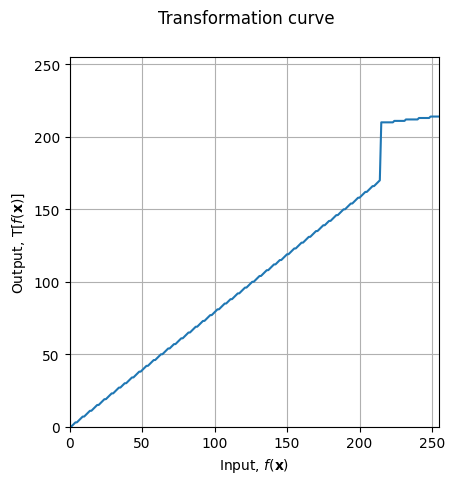

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\lut.cpp:368: error: (-215:Assertion failed) (lutcn == cn || lutcn == 1) && _lut.total() == 256 && _lut.isContinuous() && (depth == CV_8U || depth == CV_8S) in function 'cv::LUT'


In [23]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r"E:\5th Sem\IMG Processing\assignment_01_images\margot_golden_gray.jpg", cv.IMREAD_GRAYSCALE)
assert im is not None

t1 = np.linspace(0, 170, 215).astype('uint8')
t2 = np.linspace(210, 240, 255).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
fig, ax = plt.subplots()
fig.suptitle("Transformation curve")
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.grid()
plt.show()

transform_umat = np.expand_dims(transform, axis=1).astype('uint8')

image_transform = cv.LUT(im, transform_umat)

fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(image_transform, cmap="gray")
ax[1].set_title("Transformed")
plt.show()
